**Демо-экзамен по курсу "Машинное обучение"**

Выполнил: *Леньков Алексей Максимович Б22-554*

Филиал: *НИЯУ МИФИ (г.Москва)*

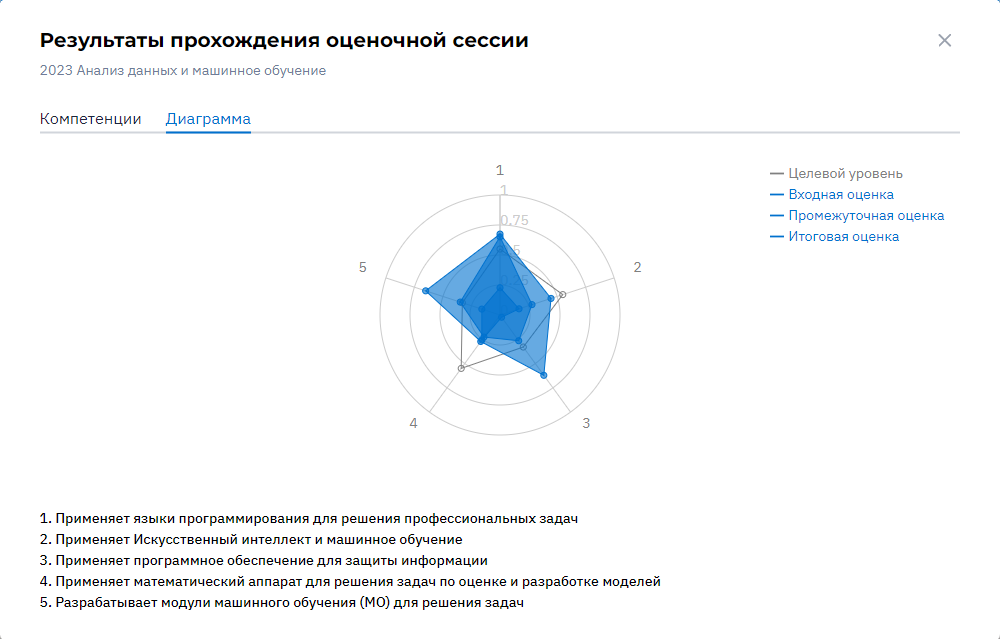

---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


*Загрузить данные в соответствии с вариантом задания*

In [ ]:
# Load data

from sklearn.datasets import load_digits
data = load_digits()


(1797, 64)


<Figure size 640x480 with 0 Axes>

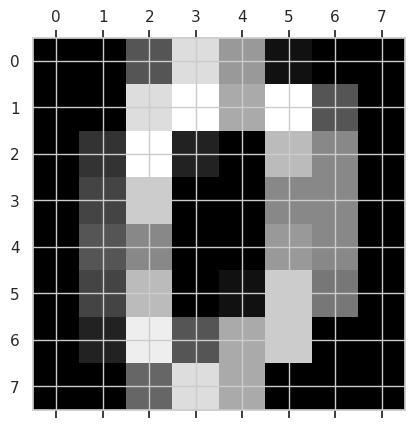

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

#sns.set(style="whitegrid")

print(data.data.shape)

plt.gray()
plt.matshow(data.images[0])
plt.show()

### 1.2 Описание исходных данных


*Привести описание исходных данных, описание и типы признаков (вещественные, целочисленные, категориальные и т.д.), объём выборки, особенности данных. Сформулировать решаемую задачу, определить тип задачи (регрессия / классификация), указать входные и выходные переменные.*

Описание и типы признаков

- Признаки:
  - Всего 64 признака, представляющие собой значения яркости пикселей (от 0 до 16).
  - Тип признаков: вещественные, так как значения могут быть дробными.

- Целевая переменная:
  - Целевая переменная — это цифра, которую изображает картинка (от 0 до 9).
  - Тип целевой переменной: категориальная, так как представляет собой классы.

Объём выборки

- Датасет состоит из 1797 образцов.
- Каждое изображение имеет размерность 8x8, что эквивалентно 64 признакам.

Особенности данных

- Данные нормализованы и имеют значения от 0 до 16.
- Изображения представлены в черно-белом формате, где 0 — это черный (пиксель неактивен), а 16 — белый (пиксель активен).
- Датасет сбалансирован, так как количество образцов для каждой цифры примерно одинаково.

Решаемая задача

- Тип задачи: классификация.
- Описание задачи: задача состоит в том, чтобы классифицировать изображения цифр (от 0 до 9) на основе значений пикселей.
  
Входные и выходные переменные

- Входные переменные:
  - 64 признака, представляющие собой значения яркости пикселей (размерность 64).

- Выходная переменная:
  - Целевая переменная, представляющая собой класс (цифру от 0 до 9).

Таким образом, задача классификации заключается в том, чтобы на основе значений пикселей предсказать, какая цифра изображена на изображении.

### 1.3 Выборочные характеристики

*Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)*

In [ ]:
X = data.data  # Признаки
y = data.target  # Целевая переменная

# Преобразование в DataFrame для удобства анализа
df = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df['target'] = y

# Основные выборочные характеристики
mean = df.mean().iloc[:-1]  # Среднее по всем признакам
variance = df.var().iloc[:-1]  # Дисперсия по всем признакам
std_dev = df.std().iloc[:-1]  # Среднеквадратическое отклонение по всем признакам
median = df.median().iloc[:-1]  # Медиана по всем признакам
mode = df.mode().iloc[0, :-1]  # Мода по всем признакам (берем первую строку)

# Вывод основных характеристик
print("Среднее:\n", mean)
print("\nДисперсия:\n", variance)
print("\nСреднеквадратическое отклонение:\n", std_dev)
print("\nМедиана:\n", median)
print("\nМода:\n", mode)

# Объемы выборок в каждом классе
class_counts = df['target'].value_counts()
print("\nОбъемы выборок в каждом классе:\n", class_counts)

Среднее:
 pixel_0      0.000000
pixel_1      0.303840
pixel_2      5.204786
pixel_3     11.835838
pixel_4     11.848080
              ...    
pixel_59    12.089037
pixel_60    11.809126
pixel_61     6.764051
pixel_62     2.067891
pixel_63     0.364496
Length: 64, dtype: float64

Дисперсия:
 pixel_0      0.000000
pixel_1      0.822997
pixel_2     22.608374
pixel_3     18.052657
pixel_4     18.381696
              ...    
pixel_59    19.137948
pixel_60    24.343836
pixel_61    34.817348
pixel_62    16.732582
pixel_63     3.460053
Length: 64, dtype: float64

Среднеквадратическое отклонение:
 pixel_0     0.000000
pixel_1     0.907192
pixel_2     4.754826
pixel_3     4.248842
pixel_4     4.287388
              ...   
pixel_59    4.374694
pixel_60    4.933947
pixel_61    5.900623
pixel_62    4.090548
pixel_63    1.860122
Length: 64, dtype: float64

Медиана:
 pixel_0      0.0
pixel_1      0.0
pixel_2      4.0
pixel_3     13.0
pixel_4     13.0
            ... 
pixel_59    13.0
pixel_60    14.0

### 1.4 Исследование распределений признаков и откликов


*Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы о характере распределений признаков (для задач классификации - в классах), наличии выбросов и т.п.*

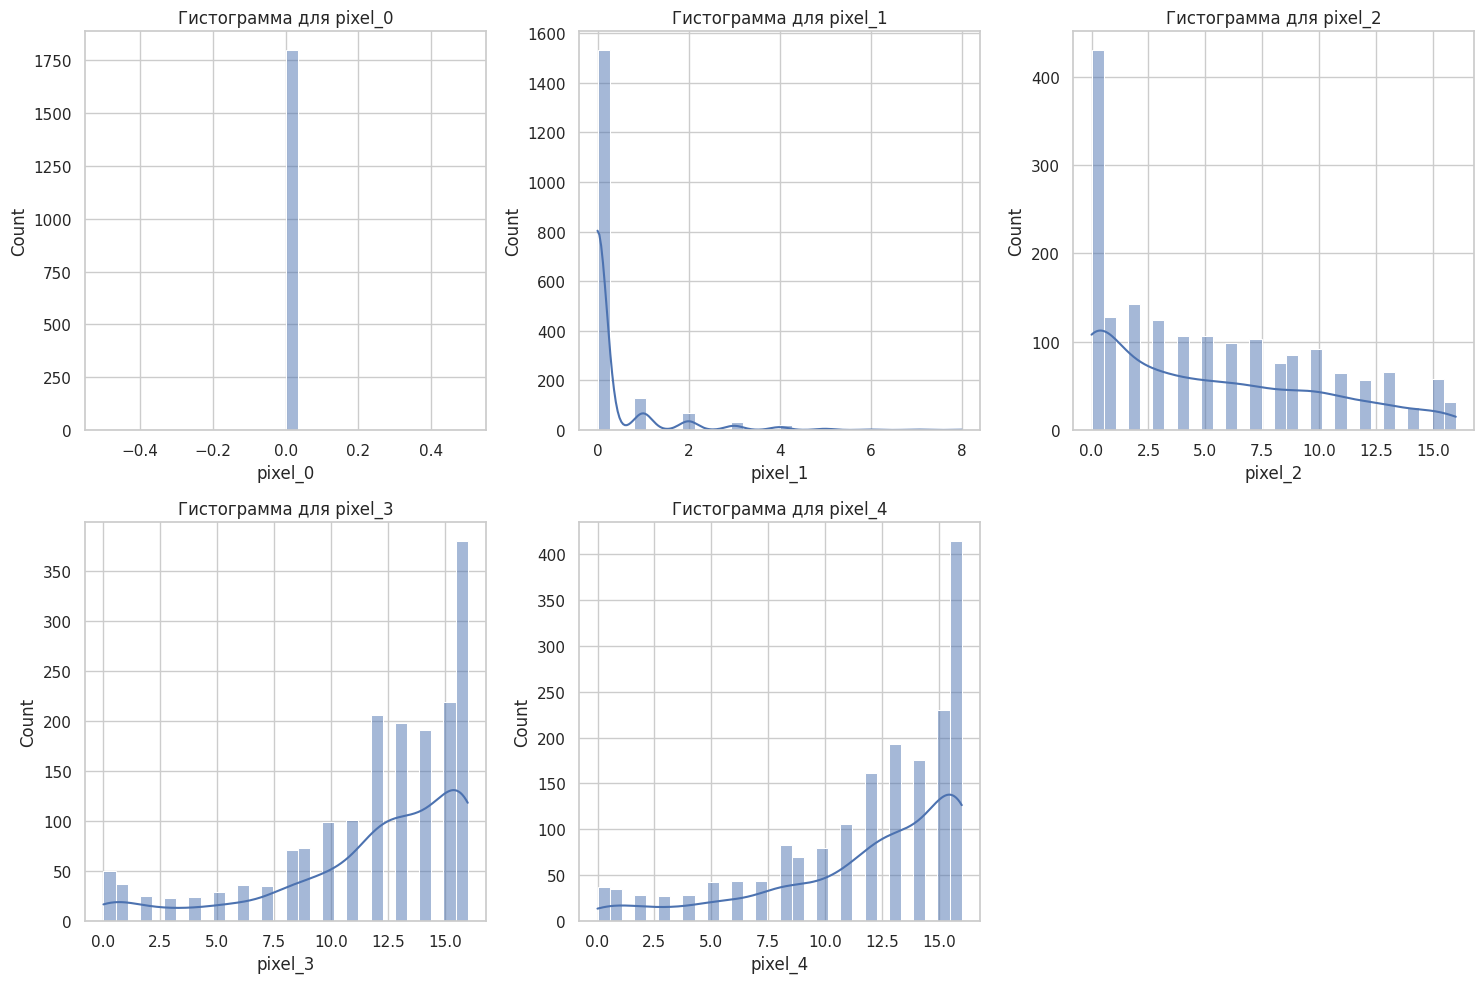

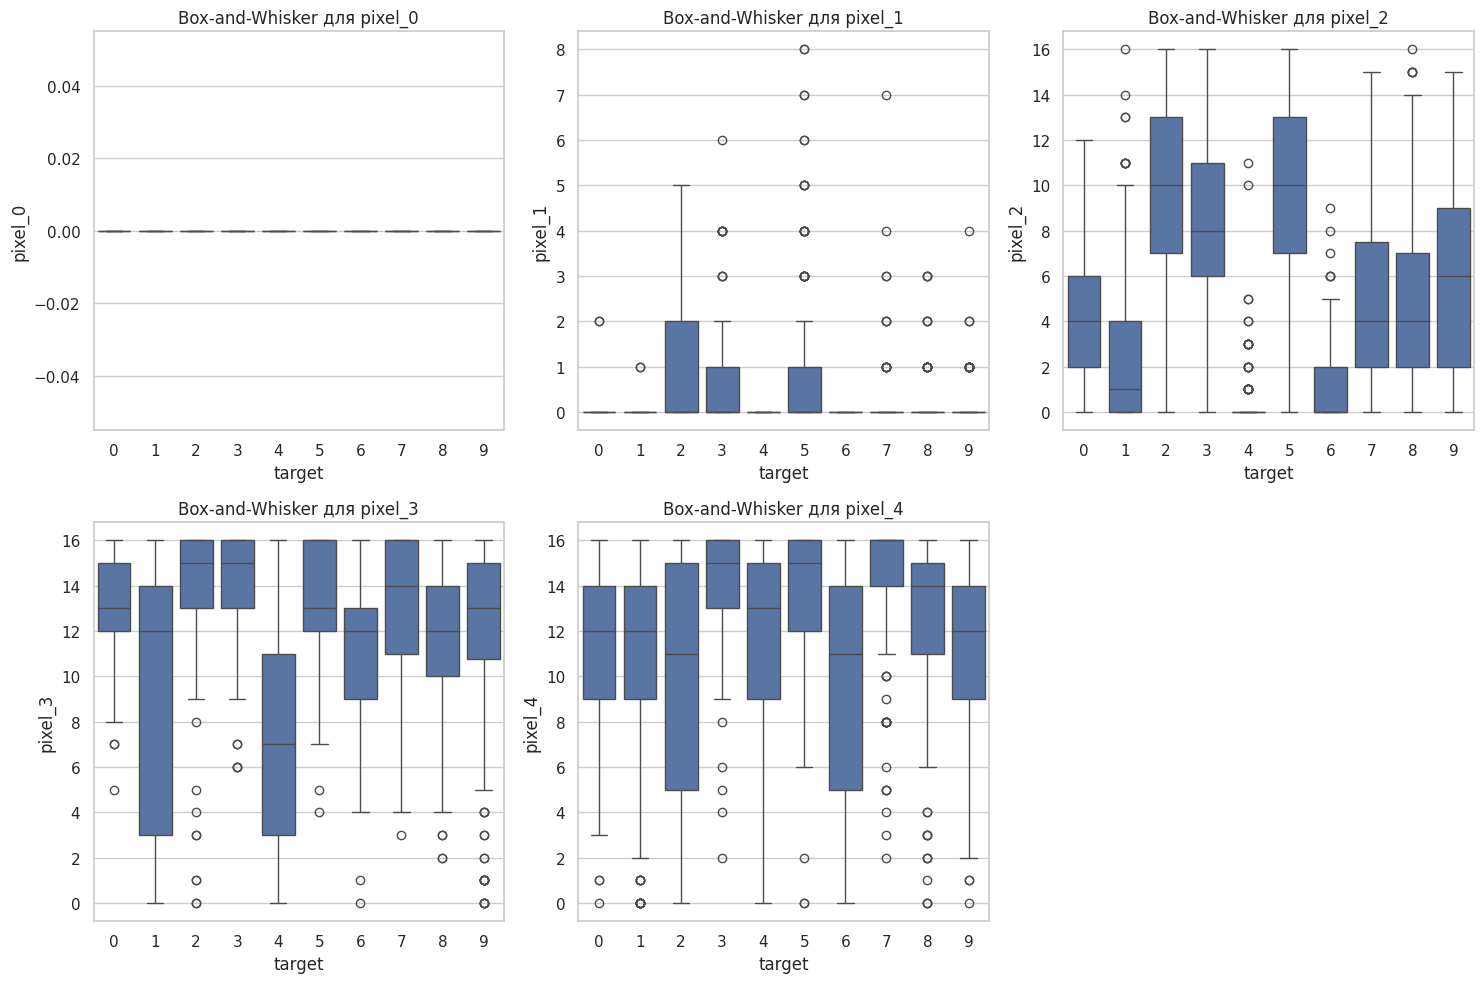

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[f'pixel_{i}'], bins=30, kde=True)
    plt.title(f'Гистограмма для pixel_{i}')
plt.tight_layout()
plt.show()

# Построение диаграмм Box-and-Whisker для первых 5 признаков
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=f'pixel_{i}', data=df)
    plt.title(f'Box-and-Whisker для pixel_{i}')
plt.tight_layout()
plt.show()

### 1.5 Корреляционный анализ данных


*Визуализировать диаграммы рассеяния и корреляционную матрицу признаков, сделать выводы*

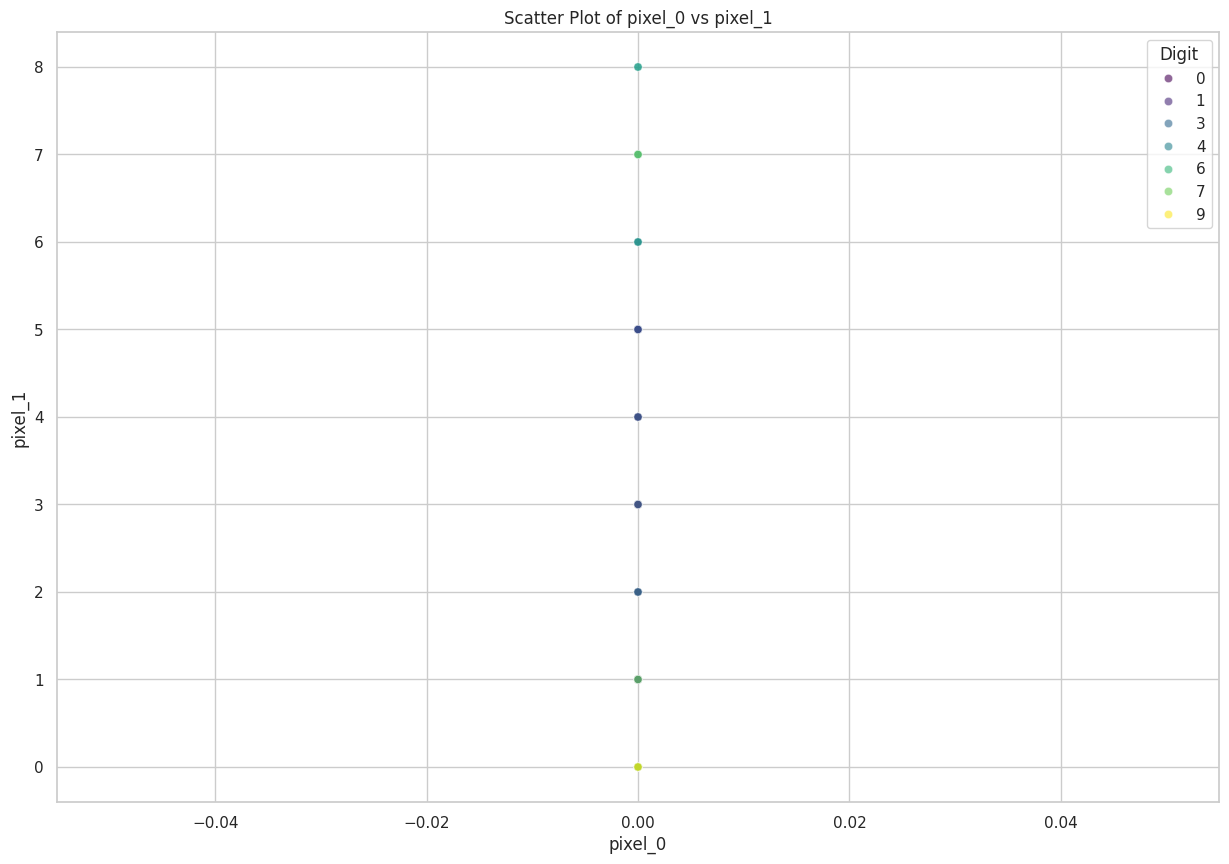

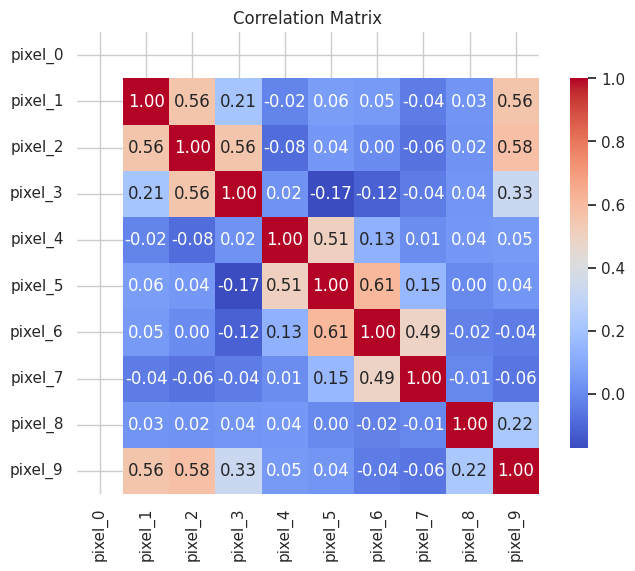

In [ ]:
# Диаграммы рассеяния (scatter plots)
plt.figure(figsize=(15, 10))
sns.scatterplot(x='pixel_0', y='pixel_1', hue=y, data=df, palette='viridis', alpha=0.6)
plt.title('Scatter Plot of pixel_0 vs pixel_1')
plt.xlabel('pixel_0')
plt.ylabel('pixel_1')
plt.legend(title='Digit')
plt.show()

df_subset = df.iloc[:, :10]  # Первые 10 пикселей

# Корреляционная матрица
correlation_matrix_subset = df_subset.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_subset, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

### 1.6 Выводы


*Сделать выводы по результатам предварительного визуального анализа исходных данных*

1. Набор данных содержит 1797 наблюдений с 64 признаками.

2. Задача является классификационной, задача состоит в том, чтобы классифицировать изображения цифр (от 0 до 9) на основе значений пикселей.

3. Значения корреляции в диапазоне 0.4-0.6 между соседними пикселями указывают на умеренную положительную связь. Это означает, что если один пиксель имеет высокое значение (яркость), то его соседние пиксели также с высокой вероятностью будут иметь высокие значения. Это может быть связано с тем, что цифры на изображениях часто имеют непрерывные контуры, и соседние пиксели в пределах одной цифры имеют схожие яркостные характеристики.


---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [ ]:
X = pd.DataFrame(data.data)
y = pd.Series(data.target)

# Объединение данных в один DataFrame
df = pd.concat([X, y], axis=1)

# Обнаружение дубликатов
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

# Устранение дубликатов
df = df.drop_duplicates()
print(f'Количество строк после удаления дубликатов: {df.shape[0]}')

Количество дубликатов: 0
Количество строк после удаления дубликатов: 1797


### 2.2 Разбиение данных на обучающую и тестовую выборки


*Разбить данные на обучающую и тестовую выборки в отношении 70/30*

In [ ]:
X = pd.DataFrame(data.data)
y = data.target

# Разделение данных на обучающую и тестовую выборки (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование входных переменных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кодирование выходной переменной
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Проверка форматов преобразованных данных
print(f'Форма X_train_scaled: {X_train_scaled.shape}')
print(f'Форма X_test_scaled: {X_test_scaled.shape}')
print(f'Форма y_train_encoded: {y_train_encoded.shape}')
print(f'Форма y_test_encoded: {y_test_encoded.shape}')

Форма X_train_scaled: (1257, 64)
Форма X_test_scaled: (540, 64)
Форма y_train_encoded: (1257,)
Форма y_test_encoded: (540,)


### 2.3 Преобразование данных

*Описать используемые способы преобразования входных и выходных переменных, привести обоснования выбранных способов преобразования, применить преобразования к обучающей и тестовой выборкам*

Использование StandardScaler для приведения признаков к одному масштабу.

Обоснование:
- Многие алгоритмы машинного обучения, такие как KNN или SVM, чувствительны к масштабу признаков. Нормализация помогает улучшить сходимость и производительность модели.

Если выходные переменные являются категориальными (например, классы), можно использовать LabelEncoder.

Обоснование:
- Кодирование позволяет перевести категориальные значения в числовые, что необходимо для большинства алгоритмов машинного обучения.

---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


*Выбрать модель и алгоритм машинного обучения для решения поставленной задачи, привести обоснование выбора, обучить модель на обучающей выборке*

In [ ]:
# Обучение модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### 3.2 Оценка качества модели


**Для задач регрессии:**
* *построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» на данных обучающей и тестовой выборок*
* *построить линейные регрессии выхода модели на желаемый выход*
* *рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок*
* *построить гистограммы распределения ошибок модели.*

**Для задач классификации:**
* *построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках.*

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели Random Forest: {accuracy:.2f}')

# Предсказание на обучающей выборке
y_train_pred = model.predict(X_train_scaled)

# Предсказание на тестовой выборке
y_test_pred = model.predict(X_test_scaled)

# Оценка точности модели
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Точность модели Random Forest на обучающей выборке: {train_accuracy:.2f}')
print(f'Точность модели Random Forest на тестовой выборке: {test_accuracy:.2f}')

# Функция для расчета показателей качества
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred, average='weighted')
    specificity = cm[0][0] / (cm[0][0] + cm[0][1]) if (cm[0][0] + cm[0][1]) > 0 else 0
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)

    return cm, sensitivity, specificity, precision, f1, kappa

# Расчет показателей качества на обучающей выборке
train_metrics = calculate_metrics(y_train, y_train_pred)
print("\nПоказатели качества на обучающей выборке:")
print(f"Матрица ошибок:\n{train_metrics[0]}")
print(f"Чувствительность (Recall): {train_metrics[1]:.2f}")
print(f"Специфичность (Specificity): {train_metrics[2]:.2f}")
print(f"Точность (Precision): {train_metrics[3]:.2f}")
print(f"F-мера (F1 Score): {train_metrics[4]:.2f}")
print(f"Каппа Коэна (Cohen's Kappa): {train_metrics[5]:.2f}")

# Расчет показателей качества на тестовой выборке
test_metrics = calculate_metrics(y_test, y_test_pred)
print("\nПоказатели качества на тестовой выборке:")
print(f"Матрица ошибок:\n{test_metrics[0]}")
print(f"Чувствительность (Recall): {test_metrics[1]:.2f}")
print(f"Специфичность (Specificity): {test_metrics[2]:.2f}")
print(f"Точность (Precision): {test_metrics[3]:.2f}")
print(f"F-мера (F1 Score): {test_metrics[4]:.2f}")
print(f"Каппа Коэна (Cohen's Kappa): {test_metrics[5]:.2f}")

Точность модели Random Forest: 0.97
Точность модели Random Forest на обучающей выборке: 1.00
Точность модели Random Forest на тестовой выборке: 0.97

Показатели качества на обучающей выборке:
Матрица ошибок:
[[125   0   0   0   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0   0   0]
 [  0   0 130   0   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   0   0]
 [  0   0   0   0 121   0   0   0   0   0]
 [  0   0   0   0   0 116   0   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 131   0]
 [  0   0   0   0   0   0   0   0   0 121]]
Чувствительность (Recall): 1.00
Специфичность (Specificity): 1.00
Точность (Precision): 1.00
F-мера (F1 Score): 1.00
Каппа Коэна (Cohen's Kappa): 1.00

Показатели качества на тестовой выборке:
Матрица ошибок:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 49  1  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0 

### 3.3 Исследование модели и алгоритма обучения


*Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.*

Лучшие гиперпараметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Точность модели на тестовой выборке: 0.97


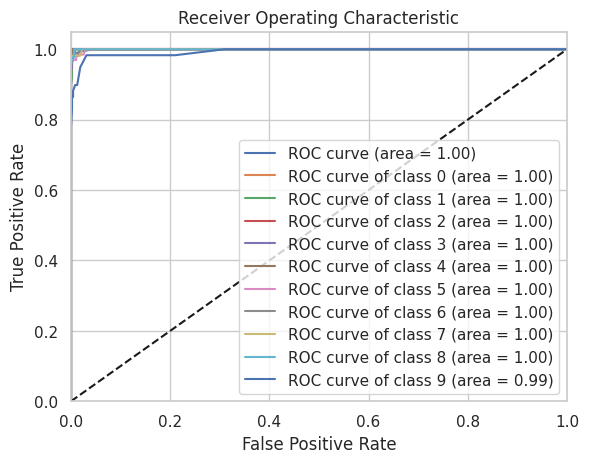

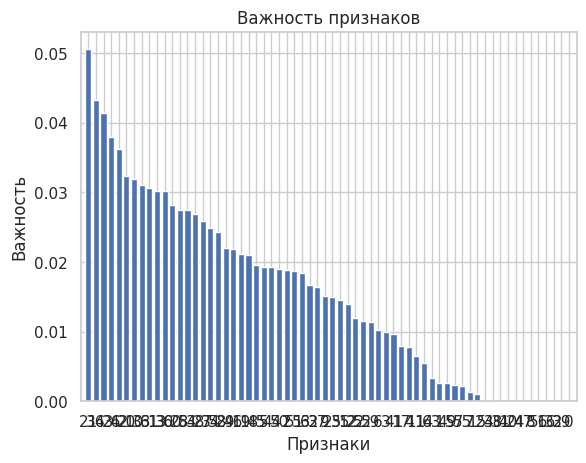

In [ ]:
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

# Оценка модели на тестовой выборке
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Точность модели на тестовой выборке: {test_accuracy:.2f}')

# Построение ROC-кривой
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]
y_test_prob = best_model.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Средняя ROC-кривая
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_test_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Построение графика ROC-кривой
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Оценка важности признаков
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Построение графика важности признаков
plt.figure()
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

### 3.4 Улучшение решения


*Предложить возможное улучшение точности решения задачи (выбрать другой тип модели, алгоритм или критерий обучения, сформулировать рекомендации по возможным способам повышения точности модели), обучить модель и сравнить показатели точности с рассчитанными в п.3.2*

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Точность модели XGBoost на тестовой выборке: 0.96


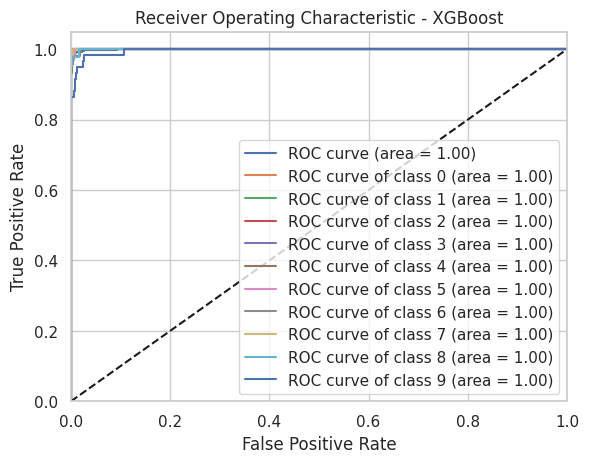

In [ ]:
from xgboost import XGBClassifier
# Разделение данных на обучающую и тестовую выборки (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование входных переменных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)

# Оценка модели на тестовой выборке
y_test_pred = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Точность модели XGBoost на тестовой выборке: {test_accuracy:.2f}')

# Построение ROC-кривой
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]
y_test_prob = model.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Средняя ROC-кривая
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_test_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Построение графика ROC-кривой
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

Точность модели XGBoost оказалась немного меньше точности модели Random Forest


### 3.5 Выводы


*Сделать выводы по результатам проведенных исследований*

1. Сравнение моделей:
   - Модель XGBoost продемонстрировала менее высокую точность по сравнению с Random Forest, что указывает на ее меньшую эффективность для данной задачи.

2. Важность признаков:
   - Выявленные важные признаки могут помочь в дальнейшем улучшении модели и углубленном понимании данных.

3. Обработка данных:
   - Эффективные методы предобработки данных, такие как масштабирование, значительно повысили производительность моделей.

4. Кросс-валидация:
   - Использование кросс-валидации обеспечило более надежные оценки производительности моделей и помогло избежать переобучения.

5. ROC-кривая:
   - Анализ ROC-кривых показал, что модель хорошо различает классы, особенно при высоких значениях AUC.